# K-Means Clustering: An In-depth Guide

## 1. Introduction to K-Means

K-Means is an **unsupervised machine learning algorithm** used for clustering data into **K** distinct groups based on feature similarity.

- **Goal:** Partition `n` data points into `K` clusters.
- **Objective:** Minimize the distance between data points and their respective cluster centers (centroids).

---

## 2. Mathematical Formulation

Given:
- Dataset:
  $$
  X = \{x_1, x_2, \dots, x_n\}, \quad x_i \in \mathbb{R}^d
  $$
- Number of clusters: $K$

We want to find **centroids**:
$$
\mu = \{\mu_1, \mu_2, \dots, \mu_K\}, \quad \mu_k \in \mathbb{R}^d
$$

The **objective function** (sum of squared distances) is:

$$
J = \sum_{i=1}^n \sum_{k=1}^K r_{ik} \| x_i - \mu_k \|^2
$$

Where:
- $r_{ik} = 1$ if $x_i$ belongs to cluster $k$, otherwise $0$.
- $\|x_i - \mu_k\|^2$ is the squared Euclidean distance.

### **Optimization Problem:**

We need to minimize $J$ with respect to:
1. **Cluster assignments** $r_{ik}$
2. **Centroid locations** $\mu_k$

---

## 3. Algorithm (Lloyd's Algorithm)

The standard K-Means algorithm iteratively performs the following:

### Step 1: Initialization
Choose $K$ random points as initial centroids (or use **K-Means++** for better initialization).

### Step 2: Assignment Step
Assign each data point to the nearest centroid:

$$
r_{ik} =
\begin{cases}
1, & \text{if } k = \arg\min_j \| x_i - \mu_j \|^2 \\
0, & \text{otherwise}
\end{cases}
$$

### Step 3: Update Step
Recalculate the centroids as the mean of all points in a cluster:

$$
\mu_k = \frac{\sum_{i=1}^n r_{ik} x_i}{\sum_{i=1}^n r_{ik}}
$$

### Step 4: Convergence
Repeat steps 2 and 3 until:
- Centroids no longer change significantly (within tolerance), or
- Maximum iterations reached.

---

## 4. Mathematical Intuition Behind Updates

### 4.1 Why Assignment Works
For fixed centroids, assigning points to the nearest centroid **minimizes** the distance term in $J$ for each point.

### 4.2 Why Update Works
For fixed assignments, minimizing $J$ with respect to $\mu_k$:

$$
\frac{\partial J}{\partial \mu_k} = -2 \sum_{i=1}^n r_{ik} (x_i - \mu_k)
$$

Setting derivative to zero:

$$
\sum_{i=1}^n r_{ik} (x_i - \mu_k) = 0
$$

Solving for $\mu_k$:

$$
\mu_k = \frac{\sum_{i=1}^n r_{ik} x_i}{\sum_{i=1}^n r_{ik}}
$$

Thus, centroids are the **mean of assigned points**.

---

## 5. Types of K-Means Variants

While the classic K-Means uses **Euclidean distance**, there are several variants:

### 5.1 K-Means++
Improves initialization by selecting initial centroids that are **far apart**, reducing chances of poor local minima.

### 5.2 Mini-Batch K-Means
- Uses small random samples (mini-batches) to update centroids.
- Faster for very large datasets.

### 5.3 Kernel K-Means
- Uses a kernel function to map data to higher dimensions.
- Useful when clusters are **non-linear** in the original space.

### 5.4 Fuzzy C-Means (Soft K-Means)
- Instead of hard assignments ($r_{ik} \in \{0,1\}$), assigns **probabilistic membership**.
- Objective:

$$
J = \sum_{i=1}^n \sum_{k=1}^K (r_{ik})^m \| x_i - \mu_k \|^2
$$

where $m > 1$ controls fuzziness.

---

## 6. Choosing K: Elbow and Silhouette Methods

### 6.1 Elbow Method
Compute $J$ for different $K$ and plot. The **"elbow point"** indicates a good $K$.

### 6.2 Silhouette Score
Measures cluster separation and cohesion:

$$
s = \frac{b - a}{\max(a, b)}
$$

Where:
- $a$ = intra-cluster distance (mean distance to points in the same cluster)
- $b$ = nearest-cluster distance (mean distance to points in the nearest cluster)

---

## 7. Computational Complexity

Time complexity per iteration:

$$
O(n \cdot K \cdot d)
$$

Where:
- $n$: number of samples
- $K$: number of clusters
- $d$: number of dimensions

---

## 8. Implementation Examples

### 8.1 From Scratch (Lloyd's Algorithm)

```python
import numpy as np

class KMeansScratch:
    def __init__(self, K=3, max_iters=100, tol=1e-4):
        self.K = K
        self.max_iters = max_iters
        self.tol = tol

    def fit(self, X):
        n_samples, n_features = X.shape
        random_idx = np.random.choice(n_samples, self.K, replace=False)
        self.centroids = X[random_idx]

        for _ in range(self.max_iters):
            labels = self._assign_clusters(X)
            new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(self.K)])

            if np.all(np.linalg.norm(new_centroids - self.centroids, axis=1) < self.tol):
                break
            self.centroids = new_centroids

        self.labels = labels

    def _assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)


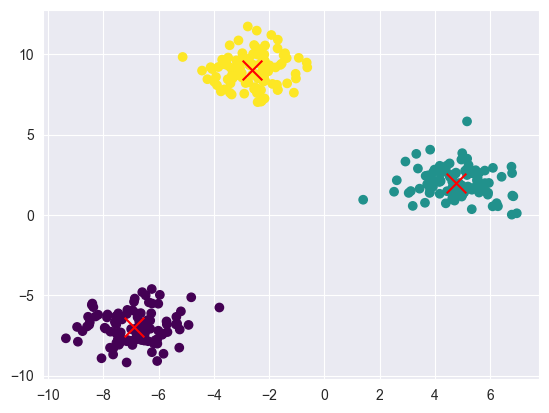

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.ops.numpy_ops.np_array_ops import newaxis


class KMeans:
    def __init__(self,K=3,max_iters=100,tol=1e-4):
        self.K=K
        self.max_iters=max_iters
        self.tol=tol


    def fit(self,X):
        n_samples,n_features=X.shape

        random_indices=np.random.choice(n_samples,self.K,replace=False)
        self.centroids=X[random_indices]

        for _ in range(self.max_iters):
            self.labels=self._assign_clusters(X)

            # calculating new centroids
            new_centroids=np.array([X[self.labels==k].mean(axis=0) for k in range(self.K)])

            # checking for the convergence
            if np.all(np.linalg.norm(new_centroids-self.centroids,axis=1)<self.tol):
                break
            self.centroids=new_centroids

    def _assign_clusters(self,X):
        distances=np.linalg.norm(X[:,np.newaxis] - self.centroids,axis=2)
        return np.argmin(distances,axis=1)

    def predict(self,X):
        return self._assign_clusters(X)



from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=300,centers=3,random_state=42)

kmeans_scratch=KMeans(K=3)
kmeans_scratch.fit(X)
labels=kmeans_scratch.predict(X)

plt.scatter(X[:,0],X[:,1],c=labels,cmap='viridis')
plt.scatter(kmeans_scratch.centroids[:,0],kmeans_scratch.centroids[:,1],c='red',marker='x',s=200)
plt.show()

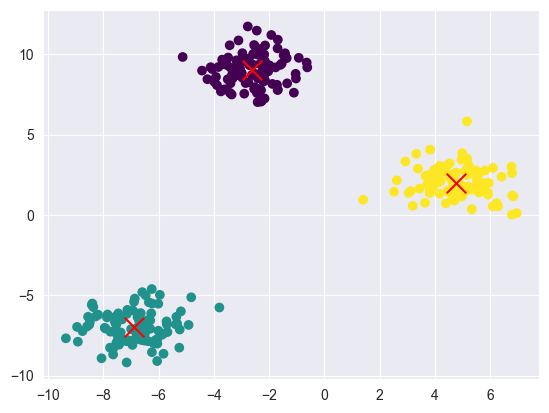

In [27]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,random_state=42)
kmeans.fit(X)
labels_builtin=kmeans.labels_

plt.scatter(X[:,0],X[:,1],c=labels_builtin,cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='x',s=200)
plt.show()


# The silhouette score is an unsupervised machine learning metric that evaluates the quality of clusters by quantifying how well data points fit into their assigned clusters versus neighboring clusters

In [30]:
from sklearn.metrics import silhouette_score,r2_score

Avs=silhouette_score(X,labels_builtin,metric='euclidean')
Avs

0.8480303059596955